In [62]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import bqplot
import matplotlib.pyplot as plt
import ipywidgets
import datetime as dt
import numpy as np

## Data viz libraries
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns # data visualization library
from plotnine import *
import plotly.express as px


In [63]:
permits = pd.read_csv("C:\\Users\\12172\\Desktop\\Data Cleaning\\final Project\\Building_Permits_2016_2020.csv")

permits.describe()
permits.dtypes

C:\Users\12172\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (18,22,35) have mixed types.Specify dtype option on import or set low_memory=False.


Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Number Suffix                       object
Street Name                                object
Street Suffix                              object
Unit                                      float64
Unit Suffix                                object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Structural Notification                    object


In [64]:
##colums having NaN values:

permits[permits["TIDF Compliance"].isnull()]

permits[["Street Number Suffix","Existing Construction Type","TIDF Compliance"]]

,Street Number Suffix,Existing Construction Type,TIDF Compliance
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,5.0,NaN
4,NaN,5.0,NaN
...,...,...,...
155497,NaN,5.0,NaN
155498,NaN,5.0,NaN
155499,NaN,5.0,NaN
155500,V,NaN,NaN


In [65]:
##lookign into dataset with approved and cancelled permits:

permits["Current Status"].unique()

array(['issued', 'complete', 'cancelled', 'expired', 'withdrawn', 'filed',
       'approved', 'reinstated', 'plancheck', 'disapproved', 'suspend',
       'incomplete', 'revoked', 'appeal', 'denied', 'unknown'],
      dtype=object)

In [66]:
#permits_types = permits.groupby(["Current Status","Permit Creation Date"])["Revised Cost"].sum()
#permits_types

permits["Current Status"]

permits["Current Status"] = permits["Current Status"].replace({'issued': 0,'complete': 0,'approved': 0,
                                                               'expired':1, 'withdrawn':1, 'filed':1,
       'reinstated':1, 'plancheck':1, 'disapproved':1, 'suspend':1,"cancelled" :1,
       'incomplete':1, 'revoked':1, 'appeal':1, 'denied':1, 'unknown':1})


permits["Current Status"].value_counts()

0    138757
1     16745
Name: Current Status, dtype: int64

In [67]:
permits_1 = permits.copy()
    
#cols_to_drop = ['Street Number Suffix', 'Street Suffix',""]
permits_1.columns

## checkin null values
permits_1.isnull().sum().sort_values(ascending = False)



TIDF Compliance                           155502
Voluntary Soft-Story Retrofit             155493
First Construction Document Date          154436
Unit Suffix                               153599
Street Number Suffix                      153376
Site Permit                               151977
Structural Notification                   150858
Fire Only Permit                          139075
Unit                                      132219
Completed Date                             86263
Existing Units                             50318
Proposed Units                             49505
Permit Expiration Date                     48243
Existing Construction Type                 37948
Existing Construction Type Description     37948
Proposed Construction Type Description     37836
Proposed Construction Type                 37835
Number of Existing Stories                 37684
Number of Proposed Stories                 37632
Proposed Use                               37468
Existing Use        

In [68]:
#permits_1[permits_1["Existing Use"]== "2 family dwelling"]

#permits_1[permits_1["Existing Use"]== nan]


#permits_1 = permits_1["Existing Use"].dropna(axis = )
#permits_1["Existing Use"] = permits_1.dropna(subset = ["Existing Use"])


permits_1 =permits_1[permits_1["Existing Use"].notnull()]

permits_1[["Existing Use"]]


#permits_1["Existing Use"].unique()

,Existing Use
3,2 family dwelling
4,1 family dwelling
5,1 family dwelling
6,1 family dwelling
7,apartments
...,...
155497,apartments
155498,apartments
155499,apartments
155500,parking lot


### USE CASE: the permits filed with same Construction type and Proposed type have high rate of approval:

In [69]:
invalid = permits_1[permits_1['Existing Construction Type'] != permits_1['Proposed Construction Type']]
invalid.groupby(["Current Status"])["Existing Construction Type","Proposed Construction Type"].count().reset_index()

C:\Users\12172\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,Current Status,Existing Construction Type,Proposed Construction Type
0,0,13031,12042
1,1,1875,1363


In [70]:
invalid_1 = permits_1[permits_1['Existing Construction Type'] == permits_1['Proposed Construction Type']]
invalid_1.groupby(["Current Status"])["Existing Construction Type","Proposed Construction Type"].count().reset_index()

C:\Users\12172\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,Current Status,Existing Construction Type,Proposed Construction Type
0,0,90341,90341
1,1,12246,12246


In the above results we can see that there number of approval rate is high for same of construction type and proposed construction type. 

### USE CASE: the permits filed with same Construction use and Proposed use have high rate of approval:

In [71]:
invalid_3 = permits_1[permits_1['Existing Use'] != permits_1['Proposed Use']]
invalid_3.groupby(["Current Status"])["Existing Use","Proposed Use"].count().reset_index()

C:\Users\12172\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,Current Status,Existing Use,Proposed Use
0,0,6682,4570
1,1,2461,1763


In [72]:
invalid_4 = permits_1[permits_1['Existing Use'] == permits_1['Proposed Use']]
invalid_4.groupby(["Current Status"])["Existing Use","Proposed Use"].count().reset_index()

C:\Users\12172\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,Current Status,Existing Use,Proposed Use
0,0,98128,98128
1,1,11929,11929


In [9]:
permits_1.columns.sort_values(ascending = False)

Index(['Zipcode', 'Voluntary Soft-Story Retrofit', 'Unit Suffix', 'Unit',
       'TIDF Compliance', 'Supervisor District', 'Structural Notification',
       'Street Suffix', 'Street Number Suffix', 'Street Number', 'Street Name',
       'Site Permit', 'Revised Cost', 'Record ID', 'Proposed Use',
       'Proposed Units', 'Proposed Construction Type Description',
       'Proposed Construction Type', 'Plansets', 'Permit Type Definition',
       'Permit Type', 'Permit Number', 'Permit Expiration Date',
       'Permit Creation Date', 'Number of Proposed Stories',
       'Number of Existing Stories', 'Neighborhoods - Analysis Boundaries',
       'Lot', 'Location', 'Issued Date', 'First Construction Document Date',
       'Fire Only Permit', 'Filed Date', 'Existing Use', 'Existing Units',
       'Existing Construction Type Description', 'Existing Construction Type',
       'Estimated Cost', 'Description', 'Current Status Date',
       'Current Status', 'Completed Date', 'Block'],
      dtype=

In [10]:
permits_1["Permit Number"].shape  ## data with permit number non-unique

(119200,)

### Dropping duplicates:

In [11]:
## Raw dataset:

result = pd.DataFrame(permits_1["Permit Number"].value_counts().reset_index())
result


,index,Permit Number
0,201811276751,12
1,202001151950,11
2,201809049013,10
3,201702239990,9
4,201708165004,9
...,...,...
107459,201611213177,1
107460,202005277850,1
107461,201706088738,1
107462,201908078174,1


In [12]:
result["Permit Number"].sum()    ### there are total 119200 permits numbers

119200

In [13]:
### duplicates:

duplicate = permits_1[permits_1["Permit Number"].duplicated()]
duplicate.tail(5)
len(duplicate) ## there are total 11736 permits duplicate permit numbers

11736

In [14]:
### there are four vlaues for permit number '202010015654'

permits_1.loc[permits_1['Permit Number'] == '202010015654']


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
155457,202010015654,3,additions alterations or repairs,10/01/2020,6526,002,1112,NaN,Shotwell,St,...,5.0,wood frame (5),5,wood frame (5),NaN,9.0,Mission,94110.0,"(37.750470978507735, -122.41528348291976)",1600432206239
155497,202010015654,3,additions alterations or repairs,10/01/2020,6526,002,1114,NaN,Shotwell,St,...,5.0,wood frame (5),5,wood frame (5),NaN,9.0,Mission,94110.0,"(37.750470978507735, -122.41528348291976)",1600494270233
155498,202010015654,3,additions alterations or repairs,10/01/2020,6526,002,1116,NaN,Shotwell,St,...,5.0,wood frame (5),5,wood frame (5),NaN,9.0,Mission,94110.0,"(37.750470978507735, -122.41528348291976)",1600496270234
155499,202010015654,3,additions alterations or repairs,10/01/2020,6526,002,1118,NaN,Shotwell,St,...,5.0,wood frame (5),5,wood frame (5),NaN,9.0,Mission,94110.0,"(37.750470978507735, -122.41528348291976)",1600497270235


In [15]:
## cleaned data count with duplicates dropped:

permits_1["Permit Number"] = permits_1["Permit Number"].drop_duplicates(keep="last", inplace=False)
results = pd.DataFrame(permits_1["Permit Number"].value_counts().reset_index())
permits_1.loc[permits_1['Permit Number'] == '202010015654']


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
155499,202010015654,3,additions alterations or repairs,10/01/2020,6526,002,1118,NaN,Shotwell,St,...,5.0,wood frame (5),5,wood frame (5),NaN,9.0,Mission,94110.0,"(37.750470978507735, -122.41528348291976)",1600497270235


In [16]:
## checking if it works:
## we can see the duplicates are removed:
## there are total 107464 rows with unique permit number:
results["Permit Number"].sum()


107464

### Dropping the unwanted columns:

These column have maximum number of null values and are marked as unwanted as this information is going to affect the further data cleaning processess or the use cases mentioned later in the project. 

In [17]:
permits_1.drop(['Street Number Suffix', 'Street Suffix', "Unit","Voluntary Soft-Story Retrofit",
                "First Construction Document Date","Site Permit","Structural Notification","Structural Notification",
                "Fire Only Permit","Proposed Units","Permit Expiration Date",
                 "Existing Construction Type Description","Proposed Construction Type Description","Unit Suffix",
                 "Existing Units","Record ID"], axis=1, inplace=True)

In [18]:
permits_1.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Name',
       'Description', 'Current Status', 'Current Status Date', 'Filed Date',
       'Issued Date', 'Completed Date', 'Number of Existing Stories',
       'Number of Proposed Stories', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Proposed Use', 'Plansets', 'TIDF Compliance',
       'Existing Construction Type', 'Proposed Construction Type',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location'],
      dtype='object')

### Making copy of the original dataset to avoid loosing on the main value if something breaks:


In [19]:
permits_filtered = permits_1.copy()


permits_1.isnull().sum().sort_values(ascending = False)

TIDF Compliance                        119200
Completed Date                          50491
Issued Date                             13230
Permit Number                           11736
Revised Cost                             4143
Proposed Construction Type               3208
Number of Proposed Stories               3016
Proposed Use                             2810
Existing Construction Type               1707
Number of Existing Stories               1449
Neighborhoods - Analysis Boundaries      1031
Supervisor District                      1025
Zipcode                                  1019
Location                                 1011
Estimated Cost                            180
Description                                64
Existing Use                                0
Plansets                                    0
Current Status Date                         0
Current Status                              0
Street Name                                 0
Street Number                     

In [20]:
# drop null values in the specific columns
permits_1 = permits_1.dropna(subset = ["Neighborhoods - Analysis Boundaries",
                        "Existing Construction Type", "Existing Construction Type"])
permits_1.head(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Description,Current Status,...,Existing Use,Proposed Use,Plansets,TIDF Compliance,Existing Construction Type,Proposed Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location
3,201610039331,8,otc alterations permit,10/03/2016,0931,055,2437,Francisco,replace 6 double hung windows in rear. no stre...,0,...,2 family dwelling,2 family dwelling,0.0,NaN,5.0,5,2.0,Marina,94123.0,"(37.80033696462303, -122.44529353997005)"
4,201610039333,3,additions alterations or repairs,10/03/2016,2114,028,1964,21st,construct one-story rear addition for new fami...,1,...,1 family dwelling,1 family dwelling,2.0,NaN,5.0,5,4.0,Sunset/Parkside,94116.0,"(37.75108020735314, -122.47807096733493)"
5,201610039335,8,otc alterations permit,10/03/2016,5892,024,48,Ney,reroofing,0,...,1 family dwelling,1 family dwelling,0.0,NaN,5.0,5,11.0,Excelsior,94112.0,"(37.72974885504086, -122.42938879489633)"
6,201610039336,8,otc alterations permit,10/03/2016,2416,003A,436,Vicente,replace (e) ductwork in garage with all new 26...,0,...,1 family dwelling,1 family dwelling,0.0,NaN,5.0,5,7.0,West of Twin Peaks,94116.0,"(37.739732323469134, -122.47178535162948)"
7,NaN,8,otc alterations permit,10/03/2016,3609,070,349,Lexington,"units 347 & 349: interior work only, remodel k...",0,...,apartments,apartments,2.0,NaN,5.0,5,9.0,Mission,94110.0,"(37.75779127704226, -122.42021951888866)"


## fixing the datatypes:

In [21]:
permits_1[["Estimated Cost"]].head(5)

,Estimated Cost
3,"9,833"
4,"49,000"
5,"5,000"
6,"6,745"
7,"25,000"


In [22]:
permits_1[["Estimated Cost"]].dtypes  ### this cant be object datatype

Estimated Cost    object
dtype: object

In [23]:
permits_1[["Estimated Cost", "Revised Cost", "Street Number", "Current Status Date",
                  "Issued Date","Filed Date","Permit Creation Date"]].dtypes

Estimated Cost          object
Revised Cost            object
Street Number            int64
Current Status Date     object
Issued Date             object
Filed Date              object
Permit Creation Date    object
dtype: object

In [24]:
## fixing the datatypes:
import re

permits_1.dtypes
#change object column to datetime
#permits_filtered["Permit Creation Date"]
permits_1["Permit Creation Date"] = pd.to_datetime(permits_1['Permit Creation Date'], format='%m/%d/%Y')

date_list = ["Current Status Date","Issued Date","Filed Date","Permit Creation Date"]

def dtype_change(list_1):
    for i in list_1:
        permits_1[i] = pd.to_datetime(permits_1[i], format='%m/%d/%Y')
    #print(permits_filtered.dtypes)
        
dtype_change(date_list)


## changing int64 to object:
permits_1["Street Number"] = permits_1.astype({"Street Number": "object"})

## replacing the commas in Estimated cost with blanks
permits_1["Estimated Cost"]  = permits_1["Estimated Cost"].str.replace(',', '')
permits_1["Revised Cost"]  = permits_1["Revised Cost"].str.replace(',', '')

##Changing the datatypes to float:
permits_1["Estimated Cost"] = permits_1["Estimated Cost"].astype(float)
permits_1["Revised Cost"] = permits_1["Revised Cost"].astype(float)

permits_1[["Estimated Cost", "Revised Cost", "Street Number", "Current Status Date",
                  "Issued Date","Filed Date","Permit Creation Date"]].head(5)

,Estimated Cost,Revised Cost,Street Number,Current Status Date,Issued Date,Filed Date,Permit Creation Date
3,9833.0,9833.0,201610039331,2017-03-27,2016-10-03,2016-10-03,2016-10-03
4,49000.0,NaN,201610039333,2019-01-16,NaT,2016-10-03,2016-10-03
5,5000.0,5000.0,201610039335,2016-10-03,2016-10-03,2016-10-03,2016-10-03
6,6745.0,7745.0,201610039336,2016-10-06,2016-10-03,2016-10-03,2016-10-03
7,25000.0,155000.0,NaN,2016-12-01,2016-12-01,2016-10-03,2016-10-03


In [25]:
## changed some of the data types:

permits_1[["Estimated Cost", "Revised Cost", "Street Number", "Current Status Date",
                  "Issued Date","Filed Date","Permit Creation Date"]].dtypes

Estimated Cost                 float64
Revised Cost                   float64
Street Number                   object
Current Status Date     datetime64[ns]
Issued Date             datetime64[ns]
Filed Date              datetime64[ns]
Permit Creation Date    datetime64[ns]
dtype: object

## Removing leading and trailing spaces

In [26]:
## removing leading and trailing spaces of all the Object datatypes columns as there are no string columns:
## Object columns can also be treated as String datatypes:

cols = permits_1.select_dtypes(['object']).columns
permits_1[cols] = permits_1[cols].apply(lambda x: x.str.strip())

permits_1[cols].head(4)

,Permit Number,Permit Type Definition,Block,Lot,Street Number,Street Name,Description,Completed Date,Existing Use,Proposed Use,Proposed Construction Type,Neighborhoods - Analysis Boundaries,Location
3,201610039331,otc alterations permit,0931,055,201610039331,Francisco,replace 6 double hung windows in rear. no stre...,03/27/2017,2 family dwelling,2 family dwelling,NaN,Marina,"(37.80033696462303, -122.44529353997005)"
4,201610039333,additions alterations or repairs,2114,028,201610039333,21st,construct one-story rear addition for new fami...,NaN,1 family dwelling,1 family dwelling,NaN,Sunset/Parkside,"(37.75108020735314, -122.47807096733493)"
5,201610039335,otc alterations permit,5892,024,201610039335,Ney,reroofing,NaN,1 family dwelling,1 family dwelling,NaN,Excelsior,"(37.72974885504086, -122.42938879489633)"
6,201610039336,otc alterations permit,2416,003A,201610039336,Vicente,replace (e) ductwork in garage with all new 26...,10/06/2016,1 family dwelling,1 family dwelling,NaN,West of Twin Peaks,"(37.739732323469134, -122.47178535162948)"


### IC Checks: 

## IC 1

#### Filling NAN values with mean number:
#### Estimates Cost  and Revised Cost cannot be zero: if zero then fill it with median value:

In [27]:
results = pd.DataFrame(permits_1["Estimated Cost"].isna())
results.head(5)


,Estimated Cost
3,False
4,False
5,False
6,False
7,False


In [28]:
len(results)

## we can see number of rows at end of the table. 

116468

In [29]:
## filling na values with mean number:
### Estimates Cost cannot be zero: if zero then fill it with median value:

permits_1["Estimated Cost"] = permits_1["Estimated Cost"].fillna(value=permits_1["Estimated Cost"].median())
permits_1["Estimated Cost"]

3           9833.0
4          49000.0
5           5000.0
6           6745.0
7          25000.0
            ...   
155496     45000.0
155497    250000.0
155498    250000.0
155499    250000.0
155501     11550.0
Name: Estimated Cost, Length: 116468, dtype: float64

In [30]:
results = pd.DataFrame(permits_1["Estimated Cost"].isna())
results.head(5)

,Estimated Cost
3,False
4,False
5,False
6,False
7,False


In [31]:
permits_1["Estimated Cost"].isna().sum()

0

In [32]:
## same thing is done with REvised Cost:

results = pd.DataFrame(permits_1["Revised Cost"].isna())
results.head(5)
len(results)

116468

In [33]:
permits_1["Revised Cost"] = permits_1["Revised Cost"].fillna(value=permits_1["Revised Cost"].median())
permits_1["Revised Cost"]


3           9833.0
4          14000.0
5           5000.0
6           7745.0
7         155000.0
            ...   
155496     45000.0
155497     14000.0
155498     14000.0
155499     14000.0
155501     11550.0
Name: Revised Cost, Length: 116468, dtype: float64

In [34]:
permits_1["Revised Cost"].isnull().sum()

0

### USE CASE : Filled date should not be greater than issued date:

In [35]:

### filled date should not be greater than issued date: 

#permits_3 = permits.copy()
permits_1 = permits_1.dropna(subset=['Permit Number'])


permits_1["Issued Date"] = pd.to_datetime(permits_1['Issued Date'], format='%m/%d/%Y')
permits_1["Filed Date"] = pd.to_datetime(permits_1['Filed Date'], format='%m/%d/%Y')

permits_1['Difference'] = (permits_1["Issued Date"] - permits_1['Filed Date']).dt.days

permits_diff = pd.DataFrame(permits_1[["Permit Number","Filed Date","Issued Date","Difference"]])
permits_diff

,Permit Number,Filed Date,Issued Date,Difference
3,201610039331,2016-10-03,2016-10-03,0.0
4,201610039333,2016-10-03,NaT,NaN
5,201610039335,2016-10-03,2016-10-03,0.0
6,201610039336,2016-10-03,2016-10-03,0.0
8,201610039338,2016-10-03,2016-10-03,0.0
...,...,...,...,...
155494,202010015694,2020-10-01,NaT,NaN
155495,202010015695,2020-10-01,NaT,NaN
155496,202010015696,2020-10-01,NaT,NaN
155499,202010015654,2020-10-01,NaT,NaN


* these are the two cases outliers of the dataset:

In [36]:
###filled dates greater than issued dates:

permit_4 = permits_1[permits_1['Difference']<0]
permit_4[["Permit Number","Filed Date","Issued Date","Difference"]]

,Permit Number,Filed Date,Issued Date,Difference
69576,201806081423,2019-04-24,2018-10-05,-201.0


### USE CASE: Filled Date Cannot be greater than completed Date: 

In [37]:
permits_1.dropna(subset = ['Completed Date'],inplace= True)               
permits_1["Completed Date"].isnull().sum()

0

In [38]:
permits_1["Completed Date"] = pd.to_datetime(permits_1['Issued Date'], format='%m/%d/%Y')
permits_1["Filed Date"] = pd.to_datetime(permits_1['Filed Date'], format='%m/%d/%Y')

permits_1['Difference_2'] = (permits_1["Completed Date"] - permits_1['Filed Date']).dt.days

permits_comp_diff = pd.DataFrame(permits_1[["Permit Number","Filed Date","Completed Date","Difference_2"]])
permits_comp_diff.head(5)

,Permit Number,Filed Date,Completed Date,Difference_2
3,201610039331,2016-10-03,2016-10-03,0.0
6,201610039336,2016-10-03,2016-10-03,0.0
8,201610039338,2016-10-03,2016-10-03,0.0
9,201610039339,2016-10-03,2016-11-14,42.0
16,201610039345,2016-10-03,2016-10-14,11.0


* these are the two cases outliers of the dataset:

In [39]:
permit_5 = permits_comp_diff[permits_comp_diff['Difference_2']<0.0]
permit_5[["Permit Number","Filed Date","Completed Date","Difference_2"]]

,Permit Number,Filed Date,Completed Date,Difference_2
69576,201806081423,2019-04-24,2018-10-05,-201.0


In [40]:
### dropping above row:

permits_1.loc[permits_1['Permit Number'] == '201806081423']

index_names = permits_1[permits_1['Permit Number'] == '201806081423'].index
permits_1.drop(index_names, inplace = True)


In [41]:
permits_1.loc[permits_1['Permit Number'] == '201806081423']


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Description,Current Status,...,Plansets,TIDF Compliance,Existing Construction Type,Proposed Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Difference,Difference_2


### IC3: Permit Number must be unique:

In [42]:
duplicate = permits_1[permits_1["Permit Number"].duplicated()]
len(duplicate)

0

In [43]:
permits_1["Permit Number"].drop_duplicates(keep=False, inplace=True)
permits_1["Permit Number"].shape
result = pd.DataFrame(permits_1["Permit Number"].value_counts().reset_index())
result

,index,Permit Number
0,201703070847,1
1,201908219456,1
2,201710252170,1
3,201903296609,1
4,201703312950,1
...,...,...
61386,201901100070,1
61387,201912169685,1
61388,201811055011,1
61389,201803264618,1


## IC 4: Number of existing stories cannot be 0:

In [44]:
## The date on which project was completed, applicable if Current Status = “completed”
### number of existing stories cannot be 0:

len(permits_filtered[permits_filtered["Number of Existing Stories"].isnull()])

#permits_filtered["Number of Existing Stories"].isna().sum()

1449

In [45]:
permits_1.dropna(subset=["Number of Existing Stories"], inplace = True)
permits_1["Number of Existing Stories"].isnull().sum()

0

## USE CASE:

## Use case 1:

In [46]:
###delays in approval of permits:
##check the current status revoked reason by getting decription column values 


## formatting the datetime columns:

permits_1.dropna(subset = ['Completed Date'],inplace= True)               
permits_1["Completed Date"].isnull().sum()

permits_1["Completed Date"] = pd.to_datetime(permits_1['Completed Date'], format='%m/%d/%Y')
permits_1["Filed Date"] = pd.to_datetime(permits_1['Filed Date'], format='%m/%d/%Y')

permits_1.head(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Description,Current Status,...,Plansets,TIDF Compliance,Existing Construction Type,Proposed Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Difference,Difference_2
3,201610039331,8,otc alterations permit,2016-10-03,0931,055,201610039331,Francisco,replace 6 double hung windows in rear. no stre...,0,...,0.0,NaN,5.0,NaN,2.0,Marina,94123.0,"(37.80033696462303, -122.44529353997005)",0.0,0.0
6,201610039336,8,otc alterations permit,2016-10-03,2416,003A,201610039336,Vicente,replace (e) ductwork in garage with all new 26...,0,...,0.0,NaN,5.0,NaN,7.0,West of Twin Peaks,94116.0,"(37.739732323469134, -122.47178535162948)",0.0,0.0
8,201610039338,8,otc alterations permit,2016-10-03,6308,004I,201610039338,Desmond,"4 window sashes in kind, woodin wood out. visi...",0,...,0.0,NaN,5.0,NaN,10.0,Visitacion Valley,94134.0,"(37.709809663658916, -122.40537879327961)",0.0,0.0
9,201610039339,8,otc alterations permit,2016-10-03,0232,016,201610039339,Embarcadero Center,"23/f- t.i., non-load bearing partitions, minor...",0,...,2.0,NaN,1.0,NaN,3.0,Financial District/South Beach,94111.0,"(37.794948260073376, -122.39729812101392)",42.0,42.0
16,201610039345,8,otc alterations permit,2016-10-03,3737,030,201610039345,Howard,revision to permit 201512175329: one sign only...,0,...,2.0,NaN,1.0,NaN,6.0,Financial District/South Beach,94105.0,"(37.78852975662498, -122.3951442732206)",11.0,11.0


In [47]:
permits_1['Difference'] = (permits_1['Completed Date'] - permits_1['Filed Date']).dt.days
permits_1.head(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Description,Current Status,...,Plansets,TIDF Compliance,Existing Construction Type,Proposed Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Difference,Difference_2
3,201610039331,8,otc alterations permit,2016-10-03,0931,055,201610039331,Francisco,replace 6 double hung windows in rear. no stre...,0,...,0.0,NaN,5.0,NaN,2.0,Marina,94123.0,"(37.80033696462303, -122.44529353997005)",0,0.0
6,201610039336,8,otc alterations permit,2016-10-03,2416,003A,201610039336,Vicente,replace (e) ductwork in garage with all new 26...,0,...,0.0,NaN,5.0,NaN,7.0,West of Twin Peaks,94116.0,"(37.739732323469134, -122.47178535162948)",0,0.0
8,201610039338,8,otc alterations permit,2016-10-03,6308,004I,201610039338,Desmond,"4 window sashes in kind, woodin wood out. visi...",0,...,0.0,NaN,5.0,NaN,10.0,Visitacion Valley,94134.0,"(37.709809663658916, -122.40537879327961)",0,0.0
9,201610039339,8,otc alterations permit,2016-10-03,0232,016,201610039339,Embarcadero Center,"23/f- t.i., non-load bearing partitions, minor...",0,...,2.0,NaN,1.0,NaN,3.0,Financial District/South Beach,94111.0,"(37.794948260073376, -122.39729812101392)",42,42.0
16,201610039345,8,otc alterations permit,2016-10-03,3737,030,201610039345,Howard,revision to permit 201512175329: one sign only...,0,...,2.0,NaN,1.0,NaN,6.0,Financial District/South Beach,94105.0,"(37.78852975662498, -122.3951442732206)",11,11.0


### sorting the delayed time more than 50 days:

In [48]:
permits_1 = permits_1[permits_1['Difference']>50] ###  threshold of issuing as 50 days

permits_1[["Filed Date", "Completed Date","Difference","Current Status",
          "Description", "Estimated Cost"]].sort_values("Difference", ascending = False)

,Filed Date,Completed Date,Difference,Current Status,Description,Estimated Cost
7797,2016-12-15,2020-01-28,1139,0,soft story retrofit per sfbc chapter 34b per 2...,39400.0
7336,2016-12-12,2019-11-14,1067,0,"administractive permit only. no construction, ...",1.0
402,2016-10-05,2019-08-20,1049,0,revisions to permit application #2016/0622/062...,10000.0
36444,2017-09-01,2020-06-12,1015,0,soft story retrofit per sfebc chapter 4d: 2016...,80000.0
3754,2016-11-07,2019-08-09,1005,0,replace (e) dry rot damaged rear deck in-kind;...,48000.0
...,...,...,...,...,...,...
62981,2018-04-17,2018-06-07,51,0,"1st fl:add 1 bedrm, 1 fam rm, 1 office, 1 bath...",160000.0
10490,2017-01-17,2017-03-09,51,0,"lower level bathroom renovation, addition of ...",87500.0
20810,2017-04-26,2017-06-16,51,0,residential; 1811-1815 residential; 700-704 fi...,110000.0
105494,2019-04-15,2019-06-05,51,0,restore floor plan back to original layout as ...,3000.0


## Use case 2:

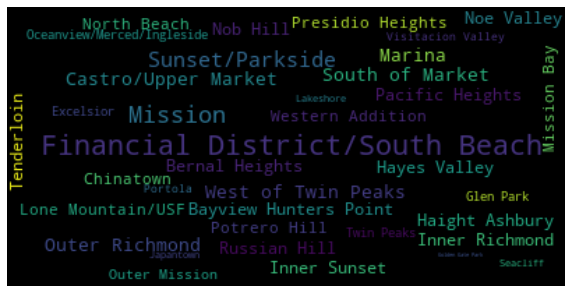

In [49]:
## Plotting Wordcloud for neighbourhoods:

from wordcloud import WordCloud
counts = permits_1["Neighborhoods - Analysis Boundaries"].value_counts()
wordcloud = WordCloud().generate_from_frequencies(counts)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Use case 3:

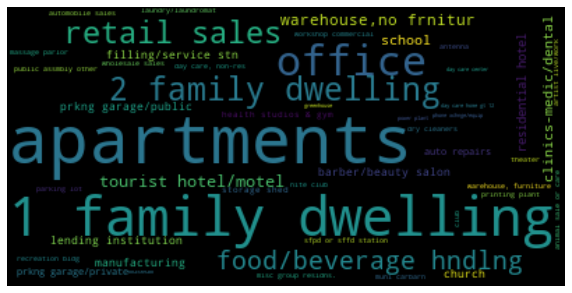

In [50]:

permits_filtered = permits_1[permits_1["Current Status"]== 1]
counts = permits_1["Existing Use"].value_counts()
wordcloud = WordCloud().generate_from_frequencies(counts)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Number contruction type for current status:

* Where current status of permit = cancelled
1. 1 family dwelling       31037
2. apartments              27977
3. office                  16953
4. 2 family dwelling       12948
5. retail sales             3974


* Where current status of permit = approved
1. 1 family dwelling    4019
2. apartments           3503
3. 2 family dwelling    1812
4. office               1681
5. retail sales          977


In [1]:
## Convert clean dataset to csv file

permits_1.to_csv('clean_dataset_permits.csv', index=False)

NameError: name 'permits_1' is not defined

In [2]:
# clean_df = pd.read_csv('clean_dataset_permits.csv')
# clean_df.head()

In [3]:
permits_1.columns

NameError: name 'permits_1' is not defined

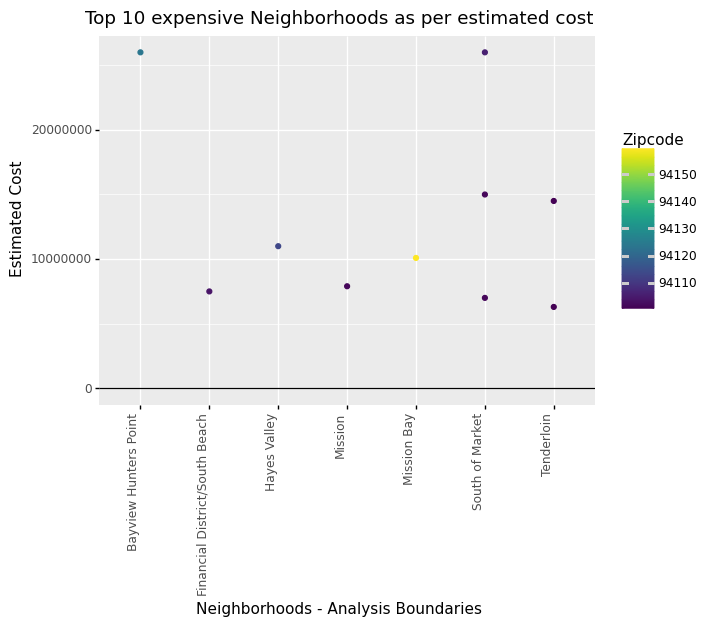

<ggplot: (-9223371914232291412)>

In [55]:
permits_cost_n= permits_1.sort_values(by ='Estimated Cost' , ascending=False)
permits_cost_n=permits_cost_n.head(10)
(ggplot(permits_cost_n)
+ aes( y='Estimated Cost',x = "Neighborhoods - Analysis Boundaries" , color = "Zipcode")
+ geom_point()
+ geom_hline(aes(yintercept = 600)) +
geom_vline(aes(xintercept = 10)) +
xlab("Neighborhoods - Analysis Boundaries") +
ylab("Estimated Cost") +
ggtitle("Top 10 expensive Neighborhoods as per estimated cost")+
theme(axis_text_x  = element_text(angle = 90, hjust = 1)))

From the above graph, we can clearly see that the most expensive neighborhood to make any permit is Bayview Hunters point and South of market . Also, most of the datapoints in the South of market shows that it is one of the most busiest or expensive streets.Rightly so, it is a vast, warehouse-filled district and its known as "SoMa". It is surrounded with all the art centers, musuems, salesforce Park and SF mint.

In [56]:
permits_cost_n['Week day']= permits_1["Completed Date"].dt.day_name()
permits_cost_n['Week day'].unique()

array(['Monday', 'Wednesday', 'Tuesday', 'Thursday'], dtype=object)

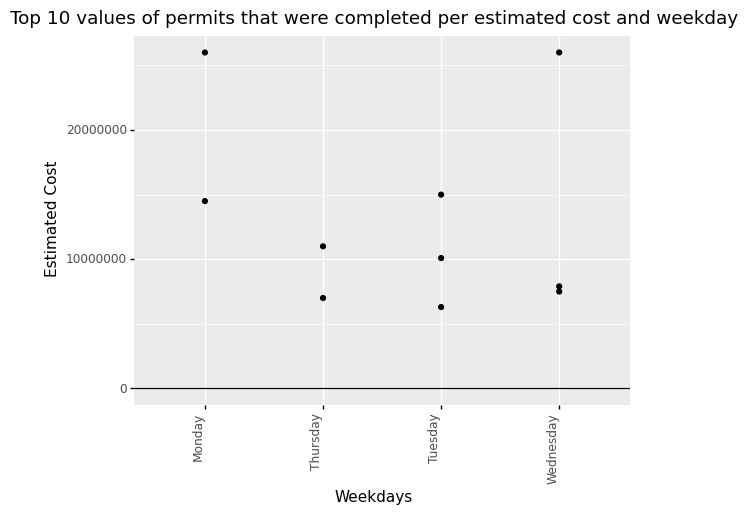

<ggplot: (-9223371914241538460)>

In [57]:
# particular weekday that is better for visiting the Building Inspections Department

permits_date= permits_cost_n.sort_values(by ='Completed Date' , ascending=False)
permits_date=permits_date.head(10)
(ggplot(permits_cost_n)
+ aes( y='Estimated Cost',x = "Week day"   )
+ geom_point()
+ geom_hline(aes(yintercept = 600)) +
geom_vline(aes(xintercept = 10)) +
xlab("Weekdays") +
ylab("Estimated Cost") +
ggtitle("Top 10 values of permits that were completed per estimated cost and weekday")+
theme(axis_text_x  = element_text(angle = 90, hjust = 1)))



From the above graph, we can see that highest cost of the permits are completed by Tuesday. Although most of the permits are completed by Friday this could be because it is the last day of the business week. Tuesday comes in the middle of the day so maybe that's why the permits of highest amount are approved or completed then as that's when the employees are super active. 

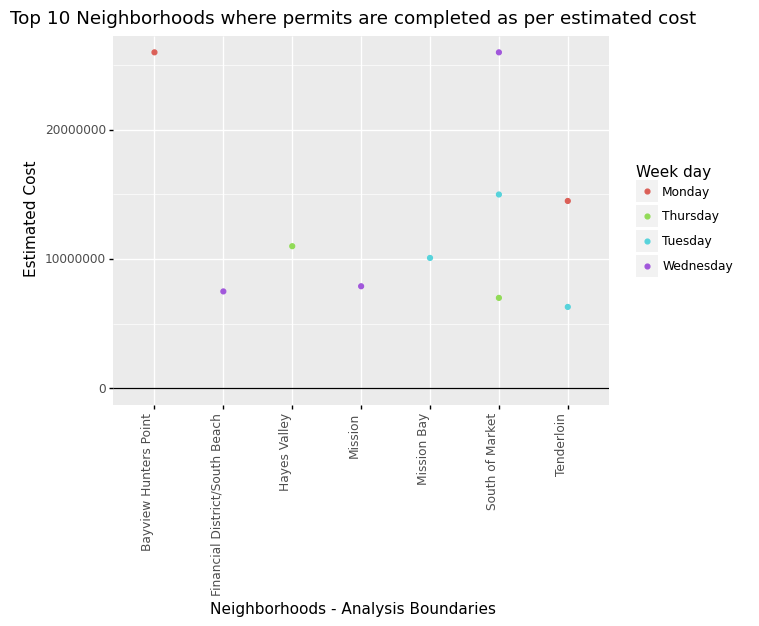

<ggplot: (-9223371914241472556)>

In [59]:
# particular weekday that is better for visiting the Building Inspections Department using neighbourhoods

permits_date= permits_cost_n.sort_values(by ='Completed Date' , ascending=False)
permits_date=permits_date.head(10)
(ggplot(permits_cost_n)
+ aes( y='Estimated Cost',x = "Neighborhoods - Analysis Boundaries" , color = "Week day")
+ geom_point()
+ geom_hline(aes(yintercept = 600)) +
geom_vline(aes(xintercept = 10)) +
xlab("Neighborhoods - Analysis Boundaries") +
ylab("Estimated Cost") +
ggtitle("Top 10 Neighborhoods where permits are completed as per estimated cost")+
theme(axis_text_x  = element_text(angle = 90, hjust = 1)))


The Bernal Heights permits get completed as soon as possible and it is done mostly on Monday and Thursday which is the middle of the week and permits are of lower cost so even if the volume is more of these permits it easier to analyze and complete. 

As per our earlier analysis on Tuesday most of the permits are filed in Inner sunset and Sunset/Parkside area. These areas are known to be expensive places to live in San Franciso. The high estimated cost of permits is probably because of all the residential and commercial development of the Sunset District.